# Project: Analyzing The United Nations Voting Dataset
### César Muro Cabral 

In [28]:
install.packages("countrycode")

Installing countrycode [1.4.0] ...
	OK [linked cache]


In [29]:
# Import any packages you want to use here
library(dplyr)
library(readr)
library(ggplot2)
library(countrycode)

In [30]:
# Importing dataset
votes <- read_rds("votes.rds")

In [19]:
# Print the votes dataset
print(votes)

# Filter for votes that are "yes", "abstain", or "no"
votes %>% filter(vote <=3)

# A tibble: 508,929 × 4
    rcid session  vote ccode
   <dbl>   <dbl> <dbl> <int>
 1    46       2     1     2
 2    46       2     1    20
 3    46       2     9    31
 4    46       2     1    40
 5    46       2     1    41
 6    46       2     1    42
 7    46       2     9    51
 8    46       2     9    52
 9    46       2     9    53
10    46       2     9    54
# … with 508,919 more rows


rcid session vote ccode
1      46   2       1      2  
2      46   2       1     20  
3      46   2       1     40  
4      46   2       1     41  
5      46   2       1     42  
6      46   2       1     70  
7      46   2       1     90  
8      46   2       1     91  
9      46   2       1     92  
10     46   2       1     93  
11     46   2       1     94  
12     46   2       1     95  
13     46   2       1    100  
14     46   2       1    101  
15     46   2       1    130  
16     46   2       1    135  
17     46   2       1    140  
18     46   2       1    150  
19     46   2       1    155  
20     46   2       1    160  
21     46   2       1    165  
22     46   2       1    200  
23     46   2       1    210  
24     46   2       1    211  
25     46   2       1    212  
26     46   2       1    220  
27     46   2       3    290  
28     46   2       3    315  
29     46   2       3    345  
30     46   2       1    350  
⋮      ⋮    ⋮       ⋮    ⋮    
353518 9056 22      3    616  
353519 9056 22      3    620  
353520 9056 22      3    625  
353521 9056 22      2    630  
353522 9056 22      2    640  
353523 9056 22      3    645  
353524 9056 22      3    651  
353525 9056 22      3    652  
353526 9056 22      3    660  
353527 9056 22      3    663  
353528 9056 22      2    666  
353529 9056 22      3    670  
353530 9056 22      3    678  
353531 9056 22      3    690  
353532 9056 22      3    700  
353533 9056 22      1    712  
353534 9056 22      1    713  
353535 9056 22      1    740  
353536 9056 22      1    750  
353537 9056 22      3    770  
353538 9056 22      2    780  
353539 9056 22      1    790  
353540 9056 22      1    800  
353541 9056 22      1    812  
353542 9056 22      3    820  
353543 9056 22      1    830  
353544 9056 22      1    840  
353545 9056 22      2    850  
353546 9056 22      1    900  
353547 9056 22      1    920

In [31]:
# Add another %>% step to add a year column
# Use mutate() to add a year column by adding 1945 to the session column.
votes %>%
  filter(vote <= 3) %>% mutate(year=session + 1945)


rcid session vote ccode year
1      46   2       1      2   1947
2      46   2       1     20   1947
3      46   2       1     40   1947
4      46   2       1     41   1947
5      46   2       1     42   1947
6      46   2       1     70   1947
7      46   2       1     90   1947
8      46   2       1     91   1947
9      46   2       1     92   1947
10     46   2       1     93   1947
11     46   2       1     94   1947
12     46   2       1     95   1947
13     46   2       1    100   1947
14     46   2       1    101   1947
15     46   2       1    130   1947
16     46   2       1    135   1947
17     46   2       1    140   1947
18     46   2       1    150   1947
19     46   2       1    155   1947
20     46   2       1    160   1947
21     46   2       1    165   1947
22     46   2       1    200   1947
23     46   2       1    210   1947
24     46   2       1    211   1947
25     46   2       1    212   1947
26     46   2       1    220   1947
27     46   2       3    290   1947
28     46   2       3    315   1947
29     46   2       3    345   1947
30     46   2       1    350   1947
⋮      ⋮    ⋮       ⋮    ⋮     ⋮   
353518 9056 22      3    616   1967
353519 9056 22      3    620   1967
353520 9056 22      3    625   1967
353521 9056 22      2    630   1967
353522 9056 22      2    640   1967
353523 9056 22      3    645   1967
353524 9056 22      3    651   1967
353525 9056 22      3    652   1967
353526 9056 22      3    660   1967
353527 9056 22      3    663   1967
353528 9056 22      2    666   1967
353529 9056 22      3    670   1967
353530 9056 22      3    678   1967
353531 9056 22      3    690   1967
353532 9056 22      3    700   1967
353533 9056 22      1    712   1967
353534 9056 22      1    713   1967
353535 9056 22      1    740   1967
353536 9056 22      1    750   1967
353537 9056 22      3    770   1967
353538 9056 22      2    780   1967
353539 9056 22      1    790   1967
353540 9056 22      1    800   1967
353541 9056 22      1    812   1967
353542 9056 22      3    820   1967
353543 9056 22      1    830   1967
353544 9056 22      1    840   1967
353545 9056 22      2    850   1967
353546 9056 22      1    900   1967
353547 9056 22      1    920   1967

The country codes in the ccode column are what's called Correlates of War codes. This isn't ideal for an analysis, since you'd like to work with recognizable country names.

You can use the countrycode package to translate. For example:

library(countrycode)

 Translate the country code 2
> countrycode(2, "cown", "country.name")
[1] "United States"

 Translate multiple country codes
> countrycode(c(2, 20, 40), "cown", "country.name")
[1] "United States" "Canada"        "Cuba"


In [32]:
# Load the countrycode package
library(countrycode)

# Convert country code 100
countrycode(100,"cown","country.name")

# Add a new country column in your mutate() statement containing country names, using the countrycode() function to translate from the ccode column. Save the result to votes_processed.
votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945) %>% mutate(votes_processed=countrycode(ccode,"cown","country.name"))

[1] "Colombia"

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
“Some values were not matched unambiguously: 260
”


Summarizing the full dataset

In this analysis, you're going to focus on "% of votes that are yes" as a metric for the "agreeableness" of countries.

You'll start by finding this summary for the entire dataset: the fraction of all votes in their history that were "yes". Note that within your call to summarize(), you can use n() to find the total number of votes and mean(vote == 1) to find the fraction of "yes" vote

In [33]:
# Print votes_processed
print(votes_processed)


# Summarize the dataset using the summarize() function to create two columns:
#    total: with the number of votes
#    percent_yes: the percentage of "yes" votes
# Find total and fraction of "yes" votes
votes_processed %>% summarise(total=n(), percent_yes=mean(vote==1))

# A tibble: 353,547 × 6
    rcid session  vote ccode  year votes_processed   
   <dbl>   <dbl> <dbl> <int> <dbl> <chr>             
 1    46       2     1     2  1947 United States     
 2    46       2     1    20  1947 Canada            
 3    46       2     1    40  1947 Cuba              
 4    46       2     1    41  1947 Haiti             
 5    46       2     1    42  1947 Dominican Republic
 6    46       2     1    70  1947 Mexico            
 7    46       2     1    90  1947 Guatemala         
 8    46       2     1    91  1947 Honduras          
 9    46       2     1    92  1947 El Salvador       
10    46       2     1    93  1947 Nicaragua         
# … with 353,537 more rows


total  percent_yes
1 353547 0.7999248

In [34]:
# Change this code to summarize by year
votes_processed %>% group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

year total percent_yes
1  1947  2039 0.5693968  
2  1949  3469 0.4375901  
3  1951  1434 0.5850767  
4  1953  1537 0.6317502  
5  1955  2169 0.6947902  
6  1957  2708 0.6085672  
7  1959  4326 0.5880721  
8  1961  7482 0.5729751  
9  1963  3308 0.7294438  
10 1965  4382 0.7078959  
11 1967  6446 0.6180577  
12 1969  4942 0.6649130  
13 1971 14648 0.7142272  
14 1973 11521 0.7718948  
15 1975  8987 0.8196284  
16 1977 13310 0.8736289  
17 1979 17103 0.8431854  
18 1981 19236 0.8401955  
19 1983 21560 0.8491651  
20 1985 22775 0.8418441  
21 1987 22067 0.8744732  
22 1989 17378 0.8830705  
23 1991 11357 0.8558598  
24 1993 10272 0.7977025  
25 1995 12645 0.8094108  
26 1997 11106 0.8074914  
27 1999 10596 0.8144583  
28 2001 10355 0.8117817  
29 2003 13099 0.8121994  
30 2005 12655 0.8229949  
31 2007 13539 0.8107689  
32 2009 12112 0.8021797  
33 2011 11453 0.8110539  
34 2013 11531 0.8070419

In [35]:
colnames(votes_processed)[6] <- "country"

In [37]:
head(votes_processed)

rcid session vote ccode year country           
1 46   2       1     2    1947 United States     
2 46   2       1    20    1947 Canada            
3 46   2       1    40    1947 Cuba              
4 46   2       1    41    1947 Haiti             
5 46   2       1    42    1947 Dominican Republic
6 46   2       1    70    1947 Mexico

In [15]:
colnames(by_country)[1] <- "country" 

In [25]:
head(by_country)

In [39]:
colnames(by_country)[1] <- "country" 
# Sort in ascending order of percent_yes
by_country %>% arrange(percent_yes)

# Now sort in descending order
by_country %>% arrange(desc(percent_yes))

country                          total percent_yes
1   Zanzibar                            2  0.0000000  
2   United States                    2568  0.2694704  
3   Palau                             369  0.3387534  
4   Israel                           2380  0.3407563  
5   NA                               1075  0.3972093  
6   United Kingdom                   2558  0.4167318  
7   France                           2527  0.4265928  
8   Micronesia (Federated States of)  724  0.4419890  
9   Marshall Islands                  757  0.4914135  
10  Belgium                          2568  0.4922118  
11  Canada                           2576  0.5081522  
12  Luxembourg                       2541  0.5120031  
13  Italy                            2382  0.5146935  
14  Netherlands                      2576  0.5221273  
15  Portugal                         2337  0.5241763  
16  Australia                        2575  0.5565049  
17  Georgia                           713  0.5694250  
18  Denmark                          2576  0.5733696  
19  Nauru                             251  0.5816733  
20  Norway                           2570  0.5821012  
21  Japan                            2384  0.5876678  
22  Taiwan                            534  0.5880150  
23  Latvia                            809  0.5945612  
24  Iceland                          2487  0.6003217  
25  Germany                           846  0.6016548  
26  New Zealand                      2569  0.6076294  
27  Lithuania                         836  0.6124402  
28  Estonia                           816  0.6151961  
29  Moldova                           745  0.6161074  
30  Sweden                           2576  0.6164596  
⋮   ⋮                                ⋮     ⋮          
171 Eritrea                           638  0.9200627  
172 Trinidad & Tobago                2116  0.9229679  
173 Burundi                          1935  0.9235142  
174 Botswana                         1903  0.9238045  
175 Angola                           1431  0.9238295  
176 Namibia                           792  0.9255051  
177 Belize                           1111  0.9270927  
178 Zambia                           2123  0.9274611  
179 Gambia                           1404  0.9280627  
180 Brunei                           1247  0.9286287  
181 Guyana                           2071  0.9314341  
182 Kuwait                           2152  0.9316914  
183 Cape Verde                       1632  0.9332108  
184 Oman                             1948  0.9332649  
185 Bahrain                          2010  0.9348259  
186 Qatar                            2001  0.9370315  
187 Suriname                         1635  0.9376147  
188 Maldives                         1847  0.9415268  
189 Bangladesh                       1799  0.9444136  
190 Yemen                             784  0.9464286  
191 Mozambique                       1701  0.9465021  
192 United Arab Emirates             1934  0.9467425  
193 Comoros                          1133  0.9470432  
194 Zimbabwe                         1361  0.9493020  
195 Mauritius                        1831  0.9497542  
196 Timor-Leste                       326  0.9570552  
197 Guinea-Bissau                    1538  0.9603381  
198 Djibouti                         1598  0.9612015  
199 Seychelles                        881  0.9750284  
200 São Tomé & Príncipe              1091  0.9761687

country                          total percent_yes
1   São Tomé & Príncipe              1091  0.9761687  
2   Seychelles                        881  0.9750284  
3   Djibouti                         1598  0.9612015  
4   Guinea-Bissau                    1538  0.9603381  
5   Timor-Leste                       326  0.9570552  
6   Mauritius                        1831  0.9497542  
7   Zimbabwe                         1361  0.9493020  
8   Comoros                          1133  0.9470432  
9   United Arab Emirates             1934  0.9467425  
10  Mozambique                       1701  0.9465021  
11  Yemen                             784  0.9464286  
12  Bangladesh                       1799  0.9444136  
13  Maldives                         1847  0.9415268  
14  Suriname                         1635  0.9376147  
15  Qatar                            2001  0.9370315  
16  Bahrain                          2010  0.9348259  
17  Oman                             1948  0.9332649  
18  Cape Verde                       1632  0.9332108  
19  Kuwait                           2152  0.9316914  
20  Guyana                           2071  0.9314341  
21  Brunei                           1247  0.9286287  
22  Gambia                           1404  0.9280627  
23  Zambia                           2123  0.9274611  
24  Belize                           1111  0.9270927  
25  Namibia                           792  0.9255051  
26  Angola                           1431  0.9238295  
27  Botswana                         1903  0.9238045  
28  Burundi                          1935  0.9235142  
29  Trinidad & Tobago                2116  0.9229679  
30  Eritrea                           638  0.9200627  
⋮   ⋮                                ⋮     ⋮          
171 Sweden                           2576  0.6164596  
172 Moldova                           745  0.6161074  
173 Estonia                           816  0.6151961  
174 Lithuania                         836  0.6124402  
175 New Zealand                      2569  0.6076294  
176 Germany                           846  0.6016548  
177 Iceland                          2487  0.6003217  
178 Latvia                            809  0.5945612  
179 Taiwan                            534  0.5880150  
180 Japan                            2384  0.5876678  
181 Norway                           2570  0.5821012  
182 Nauru                             251  0.5816733  
183 Denmark                          2576  0.5733696  
184 Georgia                           713  0.5694250  
185 Australia                        2575  0.5565049  
186 Portugal                         2337  0.5241763  
187 Netherlands                      2576  0.5221273  
188 Italy                            2382  0.5146935  
189 Luxembourg                       2541  0.5120031  
190 Canada                           2576  0.5081522  
191 Belgium                          2568  0.4922118  
192 Marshall Islands                  757  0.4914135  
193 Micronesia (Federated States of)  724  0.4419890  
194 France                           2527  0.4265928  
195 United Kingdom                   2558  0.4167318  
196 NA                               1075  0.3972093  
197 Israel                           2380  0.3407563  
198 Palau                             369  0.3387534  
199 United States                    2568  0.2694704  
200 Zanzibar                            2  0.0000000

In [40]:
# Filter out countries with fewer than 100 votes
by_country %>% filter(total > 100 ) %>%
  arrange(percent_yes)
  

country                          total percent_yes
1   United States                    2568  0.2694704  
2   Palau                             369  0.3387534  
3   Israel                           2380  0.3407563  
4   NA                               1075  0.3972093  
5   United Kingdom                   2558  0.4167318  
6   France                           2527  0.4265928  
7   Micronesia (Federated States of)  724  0.4419890  
8   Marshall Islands                  757  0.4914135  
9   Belgium                          2568  0.4922118  
10  Canada                           2576  0.5081522  
11  Luxembourg                       2541  0.5120031  
12  Italy                            2382  0.5146935  
13  Netherlands                      2576  0.5221273  
14  Portugal                         2337  0.5241763  
15  Australia                        2575  0.5565049  
16  Georgia                           713  0.5694250  
17  Denmark                          2576  0.5733696  
18  Nauru                             251  0.5816733  
19  Norway                           2570  0.5821012  
20  Japan                            2384  0.5876678  
21  Taiwan                            534  0.5880150  
22  Latvia                            809  0.5945612  
23  Iceland                          2487  0.6003217  
24  Germany                           846  0.6016548  
25  New Zealand                      2569  0.6076294  
26  Lithuania                         836  0.6124402  
27  Estonia                           816  0.6151961  
28  Moldova                           745  0.6161074  
29  Sweden                           2576  0.6164596  
30  Czechia                           772  0.6165803  
⋮   ⋮                                ⋮     ⋮          
168 Eritrea                           638  0.9200627  
169 Trinidad & Tobago                2116  0.9229679  
170 Burundi                          1935  0.9235142  
171 Botswana                         1903  0.9238045  
172 Angola                           1431  0.9238295  
173 Namibia                           792  0.9255051  
174 Belize                           1111  0.9270927  
175 Zambia                           2123  0.9274611  
176 Gambia                           1404  0.9280627  
177 Brunei                           1247  0.9286287  
178 Guyana                           2071  0.9314341  
179 Kuwait                           2152  0.9316914  
180 Cape Verde                       1632  0.9332108  
181 Oman                             1948  0.9332649  
182 Bahrain                          2010  0.9348259  
183 Qatar                            2001  0.9370315  
184 Suriname                         1635  0.9376147  
185 Maldives                         1847  0.9415268  
186 Bangladesh                       1799  0.9444136  
187 Yemen                             784  0.9464286  
188 Mozambique                       1701  0.9465021  
189 United Arab Emirates             1934  0.9467425  
190 Comoros                          1133  0.9470432  
191 Zimbabwe                         1361  0.9493020  
192 Mauritius                        1831  0.9497542  
193 Timor-Leste                       326  0.9570552  
194 Guinea-Bissau                    1538  0.9603381  
195 Djibouti                         1598  0.9612015  
196 Seychelles                        881  0.9750284  
197 São Tomé & Príncipe              1091  0.9761687

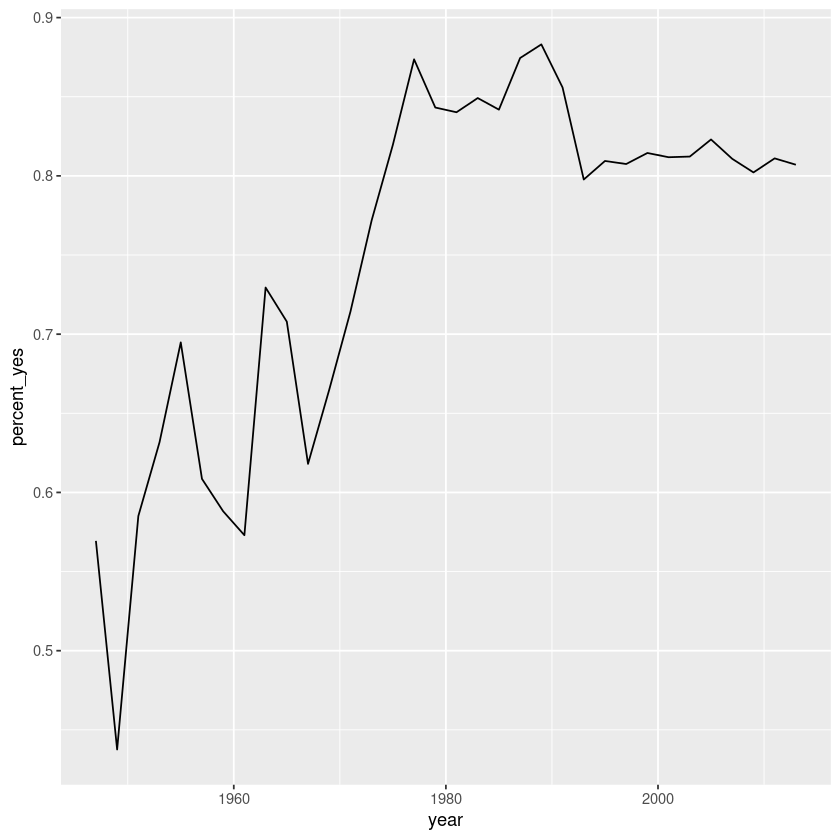

In [41]:
# Define by_year
by_year <- votes_processed %>%
  group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))
# Use ggplot() with the geom_line layer to create a line plot with year on the x-axis and percent_yes on the y-axis.
ggplot(by_year, aes(x=year,y=percent_yes)) +
  geom_line()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


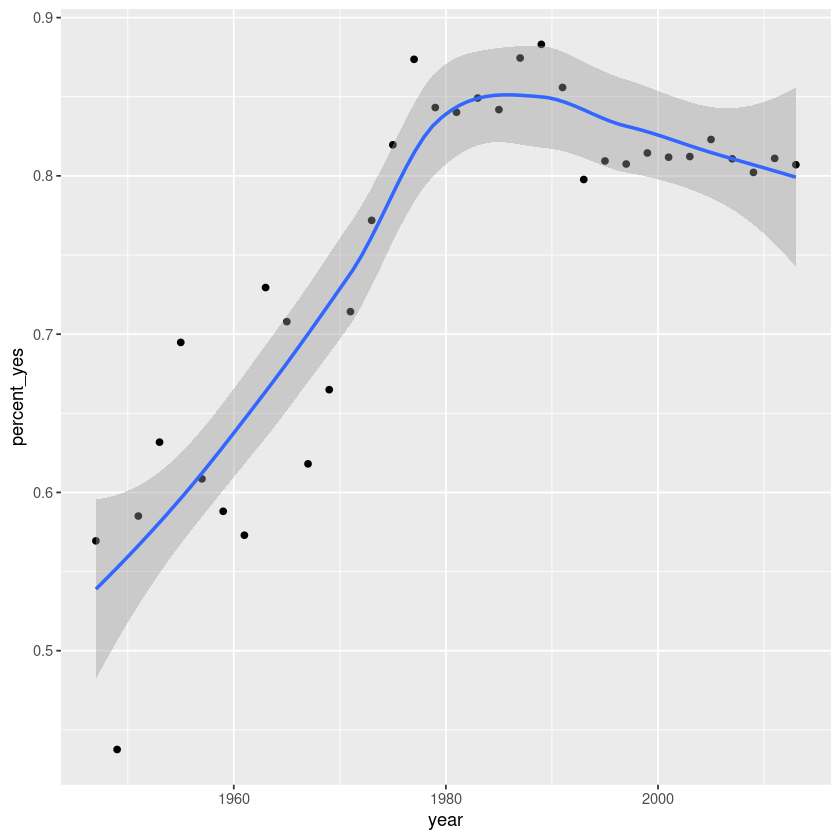

In [42]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point()+geom_smooth()
  

Summarizing by year and country

You're more interested in trends of voting within specific countries than you are in the overall trend. So instead of summarizing just by year, summarize by both year and country, constructing a dataset that shows what fraction of the time each country votes "yes" in each year.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 4,744 × 4
# Groups:   year [34]
    year country     total percent_yes
   <dbl> <chr>       <int>       <dbl>
 1  1947 Afghanistan    34       0.382
 2  1947 Argentina      38       0.579
 3  1947 Australia      38       0.553
 4  1947 Belarus        38       0.5  
 5  1947 Belgium        38       0.605
 6  1947 Bolivia        37       0.595
 7  1947 Brazil         38       0.658
 8  1947 Canada         38       0.605
 9  1947 Chile          38       0.658
10  1947 Colombia       35       0.543
# … with 4,734 more rows


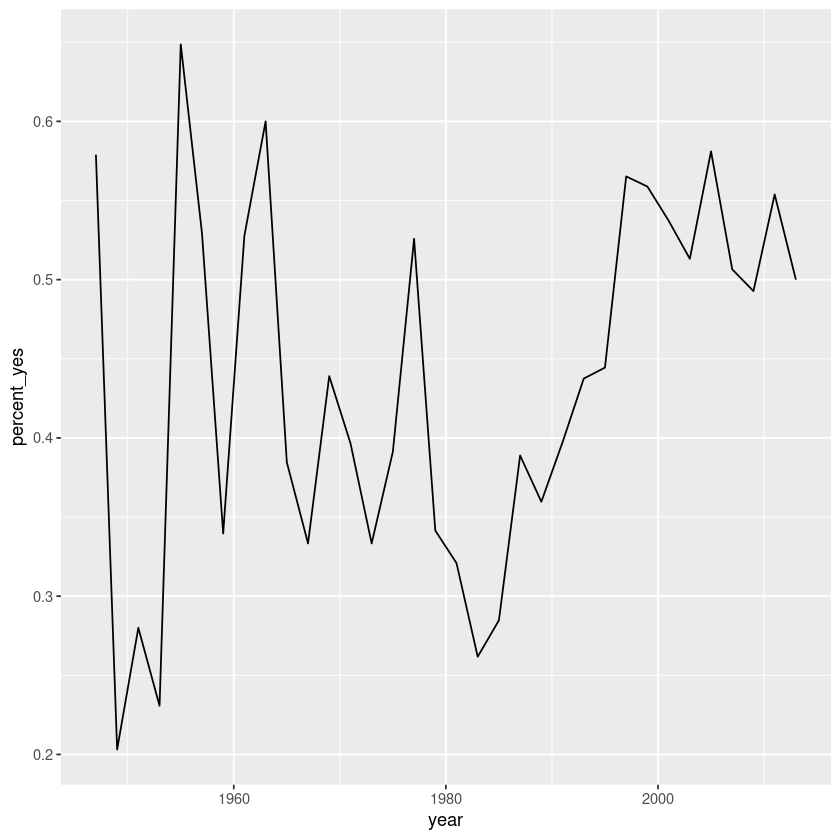

In [43]:
# Start with by_year_country dataset by grouping by year and country
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Print by_year_country
print(by_year_country)

# Create a filtered version: UK_by_year
UK_by_year <- by_year_country %>% filter(country=="United Kingdom")

# Line plot of percent_yes over time for UK only
ggplot(UK_by_year, aes(x=year,y=percent_yes)) + geom_line()

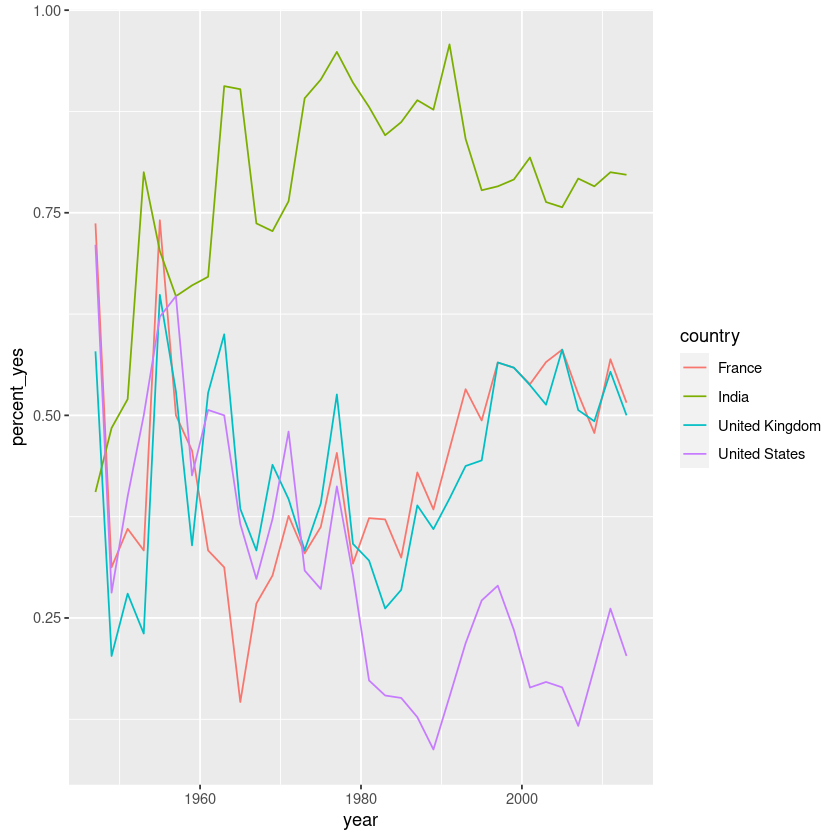

In [44]:
# Vector of four countries to examine
countries <- c("United States", "United Kingdom",
               "France", "India")

# Filter by_year_country: filtered_4_countries
filtered_4_countries <- by_year_country %>% filter(country  %in% countries)

# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(x=year,y=percent_yes,color=country)) + geom_line()

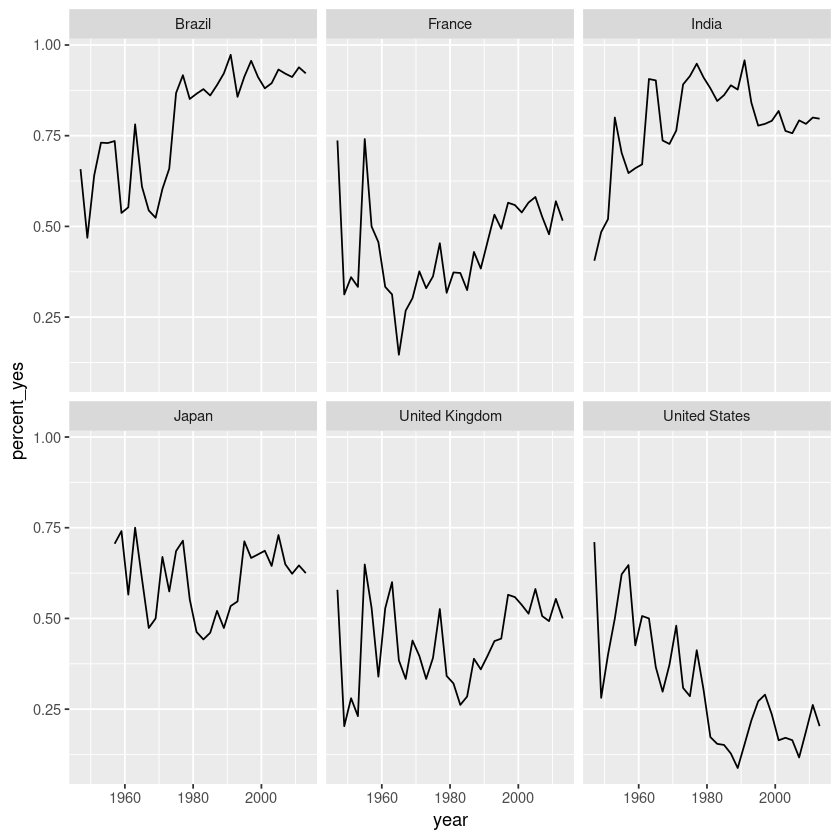

In [45]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries <- by_year_country %>% filter(country %in% countries)

# Use the filtered dataset (containing summarized data for six countries) to create a plot with one facet for each country.
# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries,aes(year,percent_yes)) +
  geom_line()+facet_wrap(~country)
  

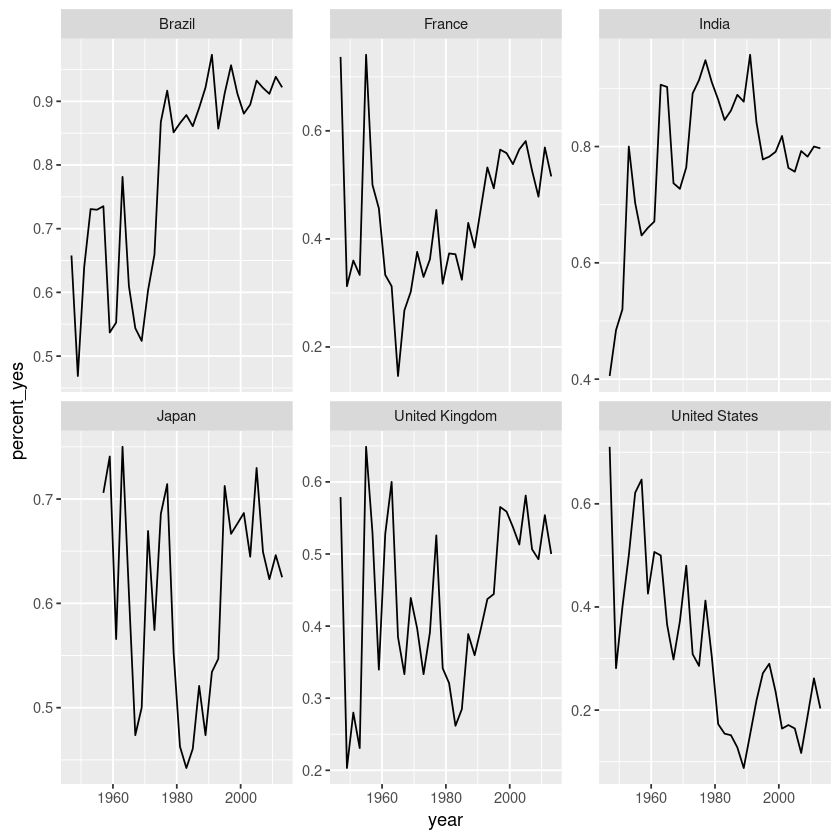

In [46]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries <- by_year_country %>%
  filter(country %in% countries)
#Change the faceted plot so that the y-axis is freely chosen for each facet, rather than being the same for all six.
# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ country,scale="free_y")

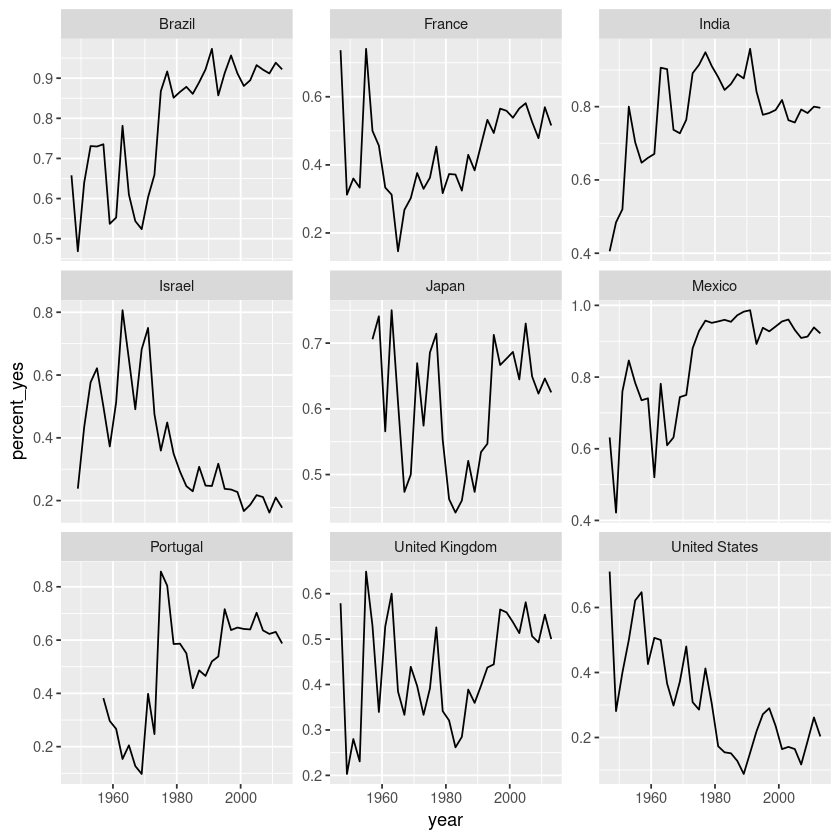

In [47]:
# Add three more countries to the countries vector and therefore to the faceted graph.
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India","Israel","Mexico","Portugal")

# Filtered by_year_country: filtered_countries
filtered_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_countries, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ country, scales = "free_y")

Linear regression on the United States

A linear regression is a model that lets us examine how one variable changes with respect to another by fitting a best fit line. It is done with the lm() function in R.

Here, you'll fit a linear regression to just the percentage of "yes" votes from the United States.

In [48]:
# Percentage of yes votes from the US by year: US_by_year
US_by_year <- by_year_country %>%
  filter(country == "United States")

# Print the US_by_year data
print(US_by_year)

# Perform a linear regression of percent_yes by year: US_fit
US_fit <- lm(percent_yes ~ year,data=US_by_year)

# Perform summary() on the US_fit object
summary(US_fit)

# A tibble: 34 × 4
# Groups:   year [34]
    year country       total percent_yes
   <dbl> <chr>         <int>       <dbl>
 1  1947 United States    38       0.711
 2  1949 United States    64       0.281
 3  1951 United States    25       0.4  
 4  1953 United States    26       0.5  
 5  1955 United States    37       0.622
 6  1957 United States    34       0.647
 7  1959 United States    54       0.426
 8  1961 United States    75       0.507
 9  1963 United States    32       0.5  
10  1965 United States    41       0.366
# … with 24 more rows



Call:
lm(formula = percent_yes ~ year, data = US_by_year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.222491 -0.080635 -0.008661  0.081948  0.194307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.6641455  1.8379743   6.890 8.48e-08 ***
year        -0.0062393  0.0009282  -6.722 1.37e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1062 on 32 degrees of freedom
Multiple R-squared:  0.5854,	Adjusted R-squared:  0.5724 
F-statistic: 45.18 on 1 and 32 DF,  p-value: 1.367e-07


For low p-values, we can rule out that the effect is due to chance

Tidying a linear regression model

In the last section, you fit a linear model. Now, you'll use the tidy() function in the broom package to turn that model into a tidy data frame.

In [49]:
library(broom)

In [21]:
# Call the tidy() function on the US_fit object
tidy(US_fit)

In [50]:
# Linear regression of percent_yes by year for US
US_by_year <- by_year_country %>%
  filter(country == "United States")
US_fit <- lm(percent_yes ~ year, US_by_year)

# Fit model for the United Kingdom
UK_by_year <- by_year_country %>% filter(country=="United Kingdom")
UK_fit <- lm(percent_yes ~ year, UK_by_year)

# Create US_tidied and UK_tidied
UK_tidied <- tidy(UK_fit)
US_tidied <- tidy(US_fit)

# Combine the two tidied models
bind_rows(US_tidied,UK_tidied)

term        estimate     std.error    statistic p.value     
1 (Intercept) 12.664145512 1.8379742715  6.890274 8.477089e-08
2 year        -0.006239305 0.0009282243 -6.721764 1.366904e-07
3 (Intercept) -3.266547873 1.9577739504 -1.668501 1.049736e-01
4 year         0.001869434 0.0009887262  1.890750 6.774177e-02

Nesting a data frame

Right now, the by_year_country data frame has one row per country-vote pair. So that you can model each country individually, you're going to "nest" all columns besides country, which will result in a data frame with one row per country. The data for each individual country will then be stored in a list column called data.

In [51]:
# Load the tidyr package
library(tidyr)

# Start with by_year_country dataset by grouping by year and country
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Nest all columns besides country
by_year_country %>% nest(-country)


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Warning message:
“All elements of `...` must be named.
Did you want `data = -country`?”


country                         
1   Afghanistan                     
2   Argentina                       
3   Australia                       
4   Belarus                         
5   Belgium                         
6   Bolivia                         
7   Brazil                          
8   Canada                          
9   Chile                           
10  Colombia                        
11  Costa Rica                      
12  Cuba                            
13  Czechoslovakia                  
14  Denmark                         
15  Dominican Republic              
16  Ecuador                         
17  Egypt                           
18  El Salvador                     
19  Ethiopia                        
20  France                          
21  Greece                          
22  Guatemala                       
23  Haiti                           
24  Honduras                        
25  Iceland                         
26  India                           
27  Iran                            
28  Iraq                            
29  Lebanon                         
30  Liberia                         
⋮   ⋮                               
171 Micronesia (Federated States of)
172 Namibia                         
173 North Korea                     
174 San Marino                      
175 South Korea                     
176 Yemen                           
177 Andorra                         
178 Croatia                         
179 Czechia                         
180 Eritrea                         
181 Georgia                         
182 Kazakhstan                      
183 Kyrgyzstan                      
184 Moldova                         
185 Monaco                          
186 North Macedonia                 
187 Slovakia                        
188 Slovenia                        
189 Tajikistan                      
190 Turkmenistan                    
191 Palau                           
192 Uzbekistan                      
193 Tonga                           
194 Kiribati                        
195 Nauru                           
196 Tuvalu                          
197 Switzerland                     
198 Timor-Leste                     
199 Montenegro                      
200 South Sudan                     
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1   1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009

In [16]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)

# Print the nested data for Brazil
print(nested$data[[7]])

In [17]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)

# Unnest the data column to return it to its original form
by_year_country %>%
  nest(-country) %>% unnest(data)

Performing linear regression on each nested dataset

Now that you've divided the data for each country into a separate dataset in the data column, you need to fit a linear model to each of these datasets.

The map() function from purrr works by applying a formula to each item in a list, where . represents the individual item. For example, you could add one to each of a list of numbers:

In [52]:
# Load tidyr and purrr
library(tidyr)
library(purrr)
library(dplyr)



# Perform a linear regression on each item in the data column. After nesting, use the map() function within a mutate() to perform a linear regression on each dataset (i.e. each item in the data column in by_year_country) modeling percent_yes as a function of year. Save the results to the model column.
by_year_country %>%
  nest(-country) %>% mutate(model=map(data, ~ lm(percent_yes ~ year,.)))

Warning message:
“All elements of `...` must be named.
Did you want `data = -country`?”


country                         
1   Afghanistan                     
2   Argentina                       
3   Australia                       
4   Belarus                         
5   Belgium                         
6   Bolivia                         
7   Brazil                          
8   Canada                          
9   Chile                           
10  Colombia                        
11  Costa Rica                      
12  Cuba                            
13  Czechoslovakia                  
14  Denmark                         
15  Dominican Republic              
16  Ecuador                         
17  Egypt                           
18  El Salvador                     
19  Ethiopia                        
20  France                          
21  Greece                          
22  Guatemala                       
23  Haiti                           
24  Honduras                        
25  Iceland                         
26  India                           
27  Iran                            
28  Iraq                            
29  Lebanon                         
30  Liberia                         
⋮   ⋮                               
171 Micronesia (Federated States of)
172 Namibia                         
173 North Korea                     
174 San Marino                      
175 South Korea                     
176 Yemen                           
177 Andorra                         
178 Croatia                         
179 Czechia                         
180 Eritrea                         
181 Georgia                         
182 Kazakhstan                      
183 Kyrgyzstan                      
184 Moldova                         
185 Monaco                          
186 North Macedonia                 
187 Slovakia                        
188 Slovenia                        
189 Tajikistan                      
190 Turkmenistan                    
191 Palau                           
192 Uzbekistan                      
193 Tonga                           
194 Kiribati                        
195 Nauru                           
196 Tuvalu                          
197 Switzerland                     
198 Timor-Leste                     
199 Montenegro                      
200 South Sudan                     
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1   1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009

In [53]:
# Load the broom package
library(broom)

# Add another mutate that applies tidy() to each model. Use the map() function to apply the tidy() function to each linear model in the model column, creating a new column called tidied
by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .))) %>%
  mutate(tidied=map(model,tidy))

Warning message:
“All elements of `...` must be named.
Did you want `data = -country`?”


country                         
1   Afghanistan                     
2   Argentina                       
3   Australia                       
4   Belarus                         
5   Belgium                         
6   Bolivia                         
7   Brazil                          
8   Canada                          
9   Chile                           
10  Colombia                        
11  Costa Rica                      
12  Cuba                            
13  Czechoslovakia                  
14  Denmark                         
15  Dominican Republic              
16  Ecuador                         
17  Egypt                           
18  El Salvador                     
19  Ethiopia                        
20  France                          
21  Greece                          
22  Guatemala                       
23  Haiti                           
24  Honduras                        
25  Iceland                         
26  India                           
27  Iran                            
28  Iraq                            
29  Lebanon                         
30  Liberia                         
⋮   ⋮                               
171 Micronesia (Federated States of)
172 Namibia                         
173 North Korea                     
174 San Marino                      
175 South Korea                     
176 Yemen                           
177 Andorra                         
178 Croatia                         
179 Czechia                         
180 Eritrea                         
181 Georgia                         
182 Kazakhstan                      
183 Kyrgyzstan                      
184 Moldova                         
185 Monaco                          
186 North Macedonia                 
187 Slovakia                        
188 Slovenia                        
189 Tajikistan                      
190 Turkmenistan                    
191 Palau                           
192 Uzbekistan                      
193 Tonga                           
194 Kiribati                        
195 Nauru                           
196 Tuvalu                          
197 Switzerland                     
198 Timor-Leste                     
199 Montenegro                      
200 South Sudan                     
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1   1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009

You now have a tidied version of each model stored in the tidied column. You want to combine all of those into a large data frame, similar to how you combined the US and UK tidied models earlier. Recall that the unnest() function from tidyr achieves this.

In [54]:
# Add one more step that unnests the tidied column
country_coefficients <- by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>% unnest(tidied)


# Print the resulting country_coefficients variable
print(country_coefficients)

Warning message:
“All elements of `...` must be named.
Did you want `data = -country`?”


# A tibble: 400 × 8
   country     data                model  term  estimate std.e…¹ stati…² p.value
   <chr>       <list>              <list> <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1 Afghanistan <gropd_df [34 × 3]> <lm>   (Int… -1.11e+1 1.47e+0   -7.52 1.44e-8
 2 Afghanistan <gropd_df [34 × 3]> <lm>   year   6.01e-3 7.43e-4    8.09 3.06e-9
 3 Argentina   <gropd_df [34 × 3]> <lm>   (Int… -9.46e+0 2.10e+0   -4.50 8.32e-5
 4 Argentina   <gropd_df [34 × 3]> <lm>   year   5.15e-3 1.06e-3    4.85 3.05e-5
 5 Australia   <gropd_df [34 × 3]> <lm>   (Int… -4.55e+0 2.15e+0   -2.12 4.22e-2
 6 Australia   <gropd_df [34 × 3]> <lm>   year   2.57e-3 1.08e-3    2.37 2.42e-2
 7 Belarus     <gropd_df [34 × 3]> <lm>   (Int… -7.00e+0 1.50e+0   -4.66 5.33e-5
 8 Belarus     <gropd_df [34 × 3]> <lm>   year   3.91e-3 7.59e-4    5.15 1.28e-5
 9 Belgium     <gropd_df [34 × 3]> <lm>   (Int… -5.85e+0 1.52e+0   -3.86 5.22e-4
10 Belgium     <gropd_df [34 × 3]> <lm>   year   3.20e-3 7.65e-4    4.19 2.07e-4
# … with

 R provides a useful built-in function for p-value correction, called p-dot-adjust.  
 
 You currently have both the intercept and slope terms for each by-country model. You're probably more interested in how each is changing over time, so you want to focus on the slope terms.

In [55]:
# Perform a filter() step that extracts only the slope (not intercept) terms.
country_coefficients %>% filter(term=='year')

country                         
1   Afghanistan                     
2   Argentina                       
3   Australia                       
4   Belarus                         
5   Belgium                         
6   Bolivia                         
7   Brazil                          
8   Canada                          
9   Chile                           
10  Colombia                        
11  Costa Rica                      
12  Cuba                            
13  Czechoslovakia                  
14  Denmark                         
15  Dominican Republic              
16  Ecuador                         
17  Egypt                           
18  El Salvador                     
19  Ethiopia                        
20  France                          
21  Greece                          
22  Guatemala                       
23  Haiti                           
24  Honduras                        
25  Iceland                         
26  India                           
27  Iran                            
28  Iraq                            
29  Lebanon                         
30  Liberia                         
⋮   ⋮                               
171 Micronesia (Federated States of)
172 Namibia                         
173 North Korea                     
174 San Marino                      
175 South Korea                     
176 Yemen                           
177 Andorra                         
178 Croatia                         
179 Czechia                         
180 Eritrea                         
181 Georgia                         
182 Kazakhstan                      
183 Kyrgyzstan                      
184 Moldova                         
185 Monaco                          
186 North Macedonia                 
187 Slovakia                        
188 Slovenia                        
189 Tajikistan                      
190 Turkmenistan                    
191 Palau                           
192 Uzbekistan                      
193 Tonga                           
194 Kiribati                        
195 Nauru                           
196 Tuvalu                          
197 Switzerland                     
198 Timor-Leste                     
199 Montenegro                      
200 South Sudan                     
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1   1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009

In [56]:
# Filter for only the slope terms
slope_terms <- country_coefficients %>%
  filter(term == "year")

# Use the p.adjust() function to adjust the p.value column, saving the result into a new p.adjusted column. Then, filter for cases where p.adjusted is less than .05.
slope_terms %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

country                 
1  Afghanistan             
2  Argentina               
3  Belarus                 
4  Belgium                 
5  Bolivia                 
6  Brazil                  
7  Chile                   
8  Colombia                
9  Costa Rica              
10 Cuba                    
11 Dominican Republic      
12 Ecuador                 
13 Egypt                   
14 El Salvador             
15 Ethiopia                
16 Guatemala               
17 Haiti                   
18 Honduras                
19 Iran                    
20 Iraq                    
21 Lebanon                 
22 Liberia                 
23 Mexico                  
24 New Zealand             
25 Nicaragua               
26 Panama                  
27 Paraguay                
28 Peru                    
29 Philippines             
30 Saudi Arabia            
⋮  ⋮                       
32 Thailand                
33 United States           
34 Uruguay                 
35 Venezuela               
36 Yemen Arab Republic     
37 Israel                  
38 Myanmar (Burma)         
39 Indonesia               
40 Jordan                  
41 Cambodia                
42 Ghana                   
43 Laos                    
44 Malaysia                
45 Morocco                 
46 Nepal                   
47 Portugal                
48 Sudan                   
49 Tunisia                 
50 Guinea                  
51 Central African Republic
52 Congo - Brazzaville     
53 Madagascar              
54 Mongolia                
55 Senegal                 
56 Sierra Leone            
57 Malawi                  
58 Maldives                
59 South Korea             
60 Kazakhstan              
61 Kyrgyzstan              
   data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 34.0000000, 51.0000000, 25.0000000, 26.0000000, 37.0000000, 34.0000000, 54.0000000, 76.0000000, 32.0000000, 40.0000000, 57.0000000, 42.0000000, 122.0000000, 92.0000000, 68.0000000, 95.0000000, 114.0000000, 125.0000000, 146.0000000, 148.0000000, 140.0000000, 114.0000000, 67.0000000, 55.0000000, 70.0000000, 59.0000000, 26.0000000, 38.0000000, 59.0000000, 66.0000000, 74.0000000, 63.0000000, 64.0000000, 60.0000000, 0.3823529, 0.6078431, 0.7600000, 0.7692308, 0.7297297, 0.5294118, 0.6111111, 0.6052632, 0.7812500, 0.85000

Now that you've filtered for countries where the trend is probably not due to chance, you may be interested in countries whose percentage of "yes" votes is changing most quickly over time. Thus, you want to find the countries with the highest and lowest slopes; that is, the estimate column.

In [57]:
# Filter by adjusted p-values
filtered_countries <- country_coefficients %>%
  filter(term == "year") %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

# Using arrange() and desc(), sort the filtered countries to find the countries whose percentage "yes" is most quickly increasing over time.
filtered_countries %>% arrange(desc(estimate))


# Using arrange(), sort to find the countries whose percentage "yes" is most quickly decreasing.
filtered_countries %>% arrange(estimate)


country                 
1  South Africa            
2  Kazakhstan              
3  Yemen Arab Republic     
4  Kyrgyzstan              
5  Malawi                  
6  Dominican Republic      
7  Portugal                
8  Honduras                
9  Peru                    
10 Nicaragua               
11 Mongolia                
12 Cambodia                
13 Chile                   
14 Jordan                  
15 Paraguay                
16 Costa Rica              
17 Thailand                
18 Colombia                
19 El Salvador             
20 Brazil                  
21 Laos                    
22 Afghanistan             
23 Saudi Arabia            
24 Guatemala               
25 Bolivia                 
26 Ecuador                 
27 Venezuela               
28 Central African Republic
29 Haiti                   
30 Mexico                  
⋮  ⋮                       
32 Argentina               
33 Ethiopia                
34 Madagascar              
35 Philippines             
36 Iraq                    
37 Panama                  
38 Liberia                 
39 Cuba                    
40 New Zealand             
41 Lebanon                 
42 Senegal                 
43 Nepal                   
44 Egypt                   
45 Maldives                
46 Malaysia                
47 Ghana                   
48 Myanmar (Burma)         
49 Indonesia               
50 Tunisia                 
51 Sierra Leone            
52 Sudan                   
53 Congo - Brazzaville     
54 Iran                    
55 Belarus                 
56 Morocco                 
57 Guinea                  
58 Belgium                 
59 United States           
60 Israel                  
61 South Korea             
   data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 38.0000000, 48.0000000, 2.0000000, 25.0000000, 11.0000000, 9.0000000, 52.0000000, 70.0000000, 20.0000000, 34.0000000, 52.0000000, 29.0000000, 82.0000000, 66.0000000, 1.0000000, 81.0000000, 68.0000000, 67.0000000, 64.0000000, 73.0000000, 73.0000000, 77.0000000, 69.0000000, 62.0000000, 62.0000000, 0.5000000, 0.2291667, 0.5000000, 0.1600000, 0.4545455, 0.2222222, 0.3461538, 0.3000000, 0.2500000, 0.1764706, 0.2307692, 0.2068966, 0.4634146, 0.2727273, 1.0000000, 0.9382716, 0.8970588, 0.8955224, 0.7656250, 0.8904110, 0.8904110, 0.9090909, 0.9275362, 0.8709677, 0.8870968                                                                             

country                 
1  South Korea             
2  Israel                  
3  United States           
4  Belgium                 
5  Guinea                  
6  Morocco                 
7  Belarus                 
8  Iran                    
9  Congo - Brazzaville     
10 Sudan                   
11 Sierra Leone            
12 Tunisia                 
13 Indonesia               
14 Myanmar (Burma)         
15 Ghana                   
16 Malaysia                
17 Maldives                
18 Egypt                   
19 Nepal                   
20 Senegal                 
21 Lebanon                 
22 New Zealand             
23 Cuba                    
24 Liberia                 
25 Panama                  
26 Iraq                    
27 Philippines             
28 Madagascar              
29 Ethiopia                
30 Argentina               
⋮  ⋮                       
32 Mexico                  
33 Haiti                   
34 Central African Republic
35 Venezuela               
36 Ecuador                 
37 Bolivia                 
38 Guatemala               
39 Saudi Arabia            
40 Afghanistan             
41 Laos                    
42 Brazil                  
43 El Salvador             
44 Colombia                
45 Thailand                
46 Costa Rica              
47 Paraguay                
48 Jordan                  
49 Chile                   
50 Cambodia                
51 Mongolia                
52 Nicaragua               
53 Peru                    
54 Honduras                
55 Portugal                
56 Dominican Republic      
57 Malawi                  
58 Kyrgyzstan              
59 Yemen Arab Republic     
60 Kazakhstan              
61 South Africa            
   data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 73.0000000, 63.0000000, 76.0000000, 69.0000000, 67.0000000, 66.0000000, 76.0000000, 74.0000000, 76.0000000, 69.0000000, 64.0000000, 63.0000000, 0.7671233, 0.7301587, 0.7763158, 0.6811594, 0.6417910, 0.6363636, 0.6052632, 0.6621622, 0.5921053, 0.5507246, 0.6250000, 0.5555556                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [58]:
descriptions <- read_rds("descriptions.rds")

Joining datasets with inner_join

In the first chapter, you created the votes_processed dataset, containing information about each country's votes. You'll now combine that with the new descriptions dataset, which includes topic information about each country, so that you can analyze votes within particular topics.

To do this, you'll make use of the inner_join() function from dplyr.

In [2]:
install.packages("countrycode")

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/countrycode_1.4.0.tar.gz' ...
	OK [downloaded 1.2 Mb in 0.2 secs]
Installing countrycode [1.4.0] ...
	OK [installed binary]
Moving countrycode [1.4.0] into the cache ...
	OK [moved to cache in 0.41 milliseconds]


In [3]:
# Load dplyr package
library(dplyr)
library(readr)
library(countrycode)
descriptions <- read_rds("descriptions.rds")
votes <- read_rds("votes.rds")

votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945) %>% mutate(votes_processed=countrycode(ccode,"cown","country.name"))

colnames(votes_processed)[6] <- "country"
# Join the two datasets votes_processed and descriptions using dplyr's inner_join(), using the rcid and session columns to match them. Save as votes_joined.
votes_joined <- votes_processed %>% inner_join(descriptions,by=c("rcid","session"))

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
“Some values were not matched unambiguously: 260
”


In [8]:
head(votes_joined)

rcid session vote ccode year country            date       unres   me nu di
1 46   2       1     2    1947 United States      1947-09-04 R/2/299 0  0  0 
2 46   2       1    20    1947 Canada             1947-09-04 R/2/299 0  0  0 
3 46   2       1    40    1947 Cuba               1947-09-04 R/2/299 0  0  0 
4 46   2       1    41    1947 Haiti              1947-09-04 R/2/299 0  0  0 
5 46   2       1    42    1947 Dominican Republic 1947-09-04 R/2/299 0  0  0 
6 46   2       1    70    1947 Mexico             1947-09-04 R/2/299 0  0  0 
  hr co ec
1 0  0  0 
2 0  0  0 
3 0  0  0 
4 0  0  0 
5 0  0  0 
6 0  0  0

There are six columns in the descriptions dataset (and therefore in the new joined dataset) that describe the topic of a resolution:

   me: Palestinian conflict
   nu: Nuclear weapons and nuclear material
   di: Arms control and disarmament
   hr: Human rights
   co: Colonialism
   ec: Economic development

Each contains a 1 if the resolution is related to this topic and a 0 otherwise.

In [4]:
# Filter the votes_joined dataset for votes relating to colonialism.
votes_joined %>% filter(co==1)

rcid session vote ccode year country             date       unres     me
1     51   2       3      2   1947 United States       1947-10-02 R/2/561   0 
2     51   2       3     20   1947 Canada              1947-10-02 R/2/561   0 
3     51   2       2     40   1947 Cuba                1947-10-02 R/2/561   0 
4     51   2       1     41   1947 Haiti               1947-10-02 R/2/561   0 
5     51   2       3     42   1947 Dominican Republic  1947-10-02 R/2/561   0 
6     51   2       2     70   1947 Mexico              1947-10-02 R/2/561   0 
7     51   2       2     90   1947 Guatemala           1947-10-02 R/2/561   0 
8     51   2       2     92   1947 El Salvador         1947-10-02 R/2/561   0 
9     51   2       3     93   1947 Nicaragua           1947-10-02 R/2/561   0 
10    51   2       2     95   1947 Panama              1947-10-02 R/2/561   0 
11    51   2       2    100   1947 Colombia            1947-10-02 R/2/561   0 
12    51   2       2    101   1947 Venezuela           1947-10-02 R/2/561   0 
13    51   2       2    130   1947 Ecuador             1947-10-02 R/2/561   0 
14    51   2       2    135   1947 Peru                1947-10-02 R/2/561   0 
15    51   2       3    140   1947 Brazil              1947-10-02 R/2/561   0 
16    51   2       3    145   1947 Bolivia             1947-10-02 R/2/561   0 
17    51   2       3    155   1947 Chile               1947-10-02 R/2/561   0 
18    51   2       3    160   1947 Argentina           1947-10-02 R/2/561   0 
19    51   2       3    165   1947 Uruguay             1947-10-02 R/2/561   0 
20    51   2       3    200   1947 United Kingdom      1947-10-02 R/2/561   0 
21    51   2       3    210   1947 Netherlands         1947-10-02 R/2/561   0 
22    51   2       3    211   1947 Belgium             1947-10-02 R/2/561   0 
23    51   2       3    212   1947 Luxembourg          1947-10-02 R/2/561   0 
24    51   2       3    220   1947 France              1947-10-02 R/2/561   0 
25    51   2       1    290   1947 Poland              1947-10-02 R/2/561   0 
26    51   2       1    315   1947 Czechoslovakia      1947-10-02 R/2/561   0 
27    51   2       1    345   1947 Yugoslavia          1947-10-02 R/2/561   0 
28    51   2       3    350   1947 Greece              1947-10-02 R/2/561   0 
29    51   2       1    365   1947 Russia              1947-10-02 R/2/561   0 
30    51   2       1    369   1947 Ukraine             1947-10-02 R/2/561   0 
⋮     ⋮    ⋮       ⋮    ⋮     ⋮    ⋮                   ⋮          ⋮         ⋮ 
60933 9051 22      3    625   1967 Sudan               1967-07-02 ESS/5/100 1 
60934 9051 22      2    630   1967 Iran                1967-07-02 ESS/5/100 1 
60935 9051 22      2    640   1967 Turkey              1967-07-02 ESS/5/100 1 
60936 9051 22      3    645   1967 Iraq                1967-07-02 ESS/5/100 1 
60937 9051 22      3    651   1967 Egypt               1967-07-02 ESS/5/100 1 
60938 9051 22      3    652   1967 Syria               1967-07-02 ESS/5/100 1 
60939 9051 22      3    660   1967 Lebanon             1967-07-02 ESS/5/100 1 
60940 9051 22      3    663   1967 Jordan              1967-07-02 ESS/5/100 1 
60941 9051 22      2    666   1967 Israel              1967-07-02 ESS/5/100 1 
60942 9051 22      3    670   1967 Saudi Arabia        1967-07-02 ESS/5/100 1 
60943 9051 22      3    678   1967 Yemen Arab Republic 1967-07-02 ESS/5/100 1 
60944 9051 22      3    690   1967 Kuwait              1967-07-02 ESS/5/100 1 
60945 9051 22      3    700   1967 Afghanistan         1967-07-02 ESS/5/100 1 
60946 9051 22      3    712   1967 Mongolia            1967-07-02 ESS/5/100 1 
60947 9051 22      1    713   1967 Taiwan              1967-07-02 ESS/5/100 1 
60948 9051 22      1    740   1967 Japan               1967-07-02 ESS/5/100 1 
60949 9051 22      3    750   1967 India               1967-07-02 ESS/5/100 1 
60950 9051 22      3    770   1967 Pakistan            1967-07-02 ESS/5/100 1 
60951 9051 22      2    775   1967 Myanmar (Burma)     1

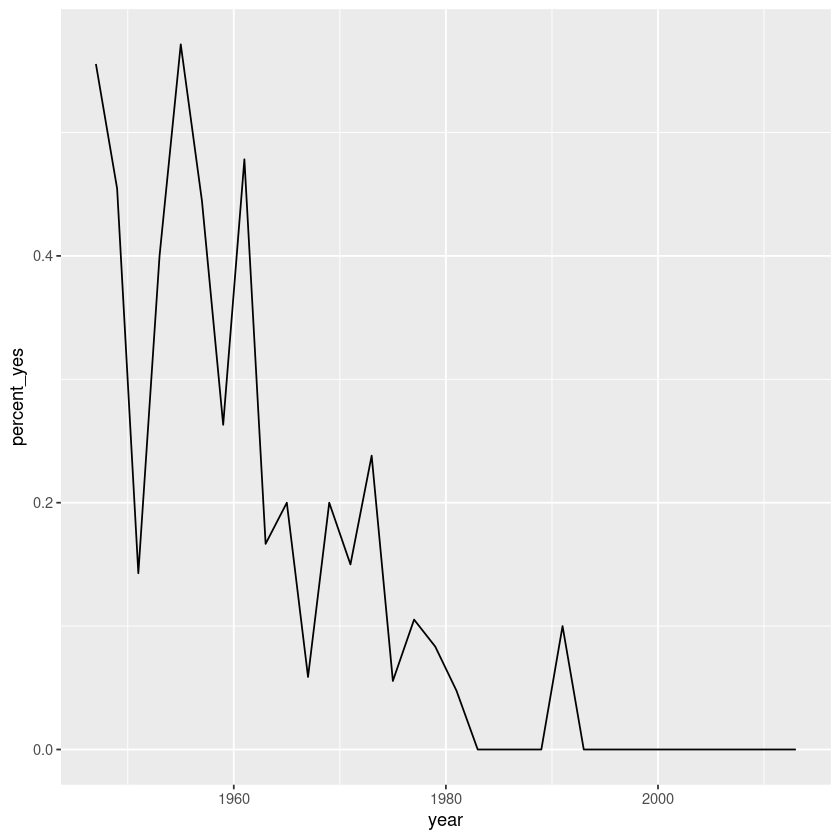

In [5]:
# Load the ggplot2 package
library(ggplot2)

# Filter the votes_joined dataset for only votes by the United States relating to colonialism, then summarize() the percentage of votes that are "yes" within each year. Name the resulting column percent_yes and save the entire data frame as US_co_by_year.
US_co_by_year <- votes_joined %>% filter(country=="United States",co==1) %>%
 group_by(year)  %>% summarize(percent_yes=mean(vote==1))


# Graph the % of "yes" votes over time
ggplot(US_co_by_year, aes(x=year,percent_yes)) + geom_line()

In [6]:
# Load the tidyr package
library(tidyr)

# Gather the six me/nu/di/hr/co/ec columns. Gather the six topic columns in votes_joined into one column called topic (containing one of me, nu, etc.) and a column called has_topic (containing 0 or 1). Print the result without saving it.
votes_joined %>%
  gather(topic, has_topic, one_of("me","nu","di","hr","co","ec"))


# Perform gather again, then filter
votes_gathered <- votes_joined %>%
  gather(topic, has_topic, one_of("me","nu","di","hr","co","ec")) %>%
  filter(has_topic == 1)


rcid session vote ccode year country             date       unres    
1       46   2       1      2   1947 United States       1947-09-04 R/2/299  
2       46   2       1     20   1947 Canada              1947-09-04 R/2/299  
3       46   2       1     40   1947 Cuba                1947-09-04 R/2/299  
4       46   2       1     41   1947 Haiti               1947-09-04 R/2/299  
5       46   2       1     42   1947 Dominican Republic  1947-09-04 R/2/299  
6       46   2       1     70   1947 Mexico              1947-09-04 R/2/299  
7       46   2       1     90   1947 Guatemala           1947-09-04 R/2/299  
8       46   2       1     91   1947 Honduras            1947-09-04 R/2/299  
9       46   2       1     92   1947 El Salvador         1947-09-04 R/2/299  
10      46   2       1     93   1947 Nicaragua           1947-09-04 R/2/299  
11      46   2       1     94   1947 Costa Rica          1947-09-04 R/2/299  
12      46   2       1     95   1947 Panama              1947-09-04 R/2/299  
13      46   2       1    100   1947 Colombia            1947-09-04 R/2/299  
14      46   2       1    101   1947 Venezuela           1947-09-04 R/2/299  
15      46   2       1    130   1947 Ecuador             1947-09-04 R/2/299  
16      46   2       1    135   1947 Peru                1947-09-04 R/2/299  
17      46   2       1    140   1947 Brazil              1947-09-04 R/2/299  
18      46   2       1    150   1947 Paraguay            1947-09-04 R/2/299  
19      46   2       1    155   1947 Chile               1947-09-04 R/2/299  
20      46   2       1    160   1947 Argentina           1947-09-04 R/2/299  
21      46   2       1    165   1947 Uruguay             1947-09-04 R/2/299  
22      46   2       1    200   1947 United Kingdom      1947-09-04 R/2/299  
23      46   2       1    210   1947 Netherlands         1947-09-04 R/2/299  
24      46   2       1    211   1947 Belgium             1947-09-04 R/2/299  
25      46   2       1    212   1947 Luxembourg          1947-09-04 R/2/299  
26      46   2       1    220   1947 France              1947-09-04 R/2/299  
27      46   2       3    290   1947 Poland              1947-09-04 R/2/299  
28      46   2       3    315   1947 Czechoslovakia      1947-09-04 R/2/299  
29      46   2       3    345   1947 Yugoslavia          1947-09-04 R/2/299  
30      46   2       1    350   1947 Greece              1947-09-04 R/2/299  
⋮       ⋮    ⋮       ⋮    ⋮     ⋮    ⋮                   ⋮          ⋮        
2121253 9056 22      3    616   1967 Tunisia             1967-07-05 ESS/5/100
2121254 9056 22      3    620   1967 Libya               1967-07-05 ESS/5/100
2121255 9056 22      3    625   1967 Sudan               1967-07-05 ESS/5/100
2121256 9056 22      2    630   1967 Iran                1967-07-05 ESS/5/100
2121257 9056 22      2    640   1967 Turkey              1967-07-05 ESS/5/100
2121258 9056 22      3    645   1967 Iraq                1967-07-05 ESS/5/100
2121259 9056 22      3    651   1967 Egypt               1967-07-05 ESS/5/100
2121260 9056 22      3    652   1967 Syria               1967-07-05 ESS/5/100
2121261 9056 22      3    660   1967 Lebanon             1967-07-05 ESS/5/100
2121262 9056 22      3    663   1967 Jordan              1967-07-05 ESS/5/100
2121263 9056 22      2    666   1967 Israel              1967-07-05 ESS/5/100
2121264 9056 22      3    670   1967 Saudi Arabia        1967-07-05 ESS/5/100
2121265 9056 22      3    678   1967 Yemen Arab Republic 1967-07-05 ESS/5/100
2121266 9056 22      3    690   1967 Kuwait              1967-07-05 ESS/5/100
2121267 9056 22      3    700   1967 Afghanistan         1967-07-05 ESS/5/100
2121268 9056 22      1    712   1967 Mongolia            1967-07-05 ESS/5/100
2121269 9056 22      1    713   1967 Taiwan              1967-07-05 ESS/5/100
2121270 9056 22      1    740   1967 Japan               1967-07-05 ESS/5/100
2121271 9056 22      1    750   1967 India               1967-07-05 ESS/5/100
2121272 9056 22      3    770 

In [7]:
## Use the recode() function from dplyr in a mutate() to replace each two-letter code in the votes_gathered data frame with the corresponding full name. Save this as votes_tidied.
# Replace the two-letter codes in topic: votes_tidied
votes_tidied <- votes_gathered %>%
  mutate(topic = recode(topic,
                        me = "Palestinian conflict",
                        nu = "Nuclear weapons and nuclear material",
                        di = "Arms control and disarmament",
                        hr = "Human rights",
                        co = "Colonialism",
                        ec = "Economic development"))


In [8]:

# In a single summarize() call, compute both the total number of votes (total) and the percentage of "yes" votes (percent_yes) for each combination of country, year, and topic. Save this as by_country_year_topic. Make sure that you ungroup() after summarizing.
by_country_year_topic <- votes_tidied %>% group_by(country,year,topic) %>% summarise(total=n(),percent_yes=mean(vote==1)) %>% ungroup()

# Print by_country_year_topic
print(by_country_year_topic)

`summarise()` has grouped output by 'country', 'year'. You can override using
the `.groups` argument.


# A tibble: 26,968 × 5
   country      year topic                                total percent_yes
   <chr>       <dbl> <chr>                                <int>       <dbl>
 1 Afghanistan  1947 Colonialism                              8       0.5  
 2 Afghanistan  1947 Economic development                     1       0    
 3 Afghanistan  1947 Human rights                             1       0    
 4 Afghanistan  1947 Palestinian conflict                     6       0    
 5 Afghanistan  1949 Arms control and disarmament             3       0    
 6 Afghanistan  1949 Colonialism                             22       0.864
 7 Afghanistan  1949 Economic development                     1       1    
 8 Afghanistan  1949 Human rights                             3       0    
 9 Afghanistan  1949 Nuclear weapons and nuclear material     3       0    
10 Afghanistan  1949 Palestinian conflict                    11       0.818
# … with 26,958 more rows


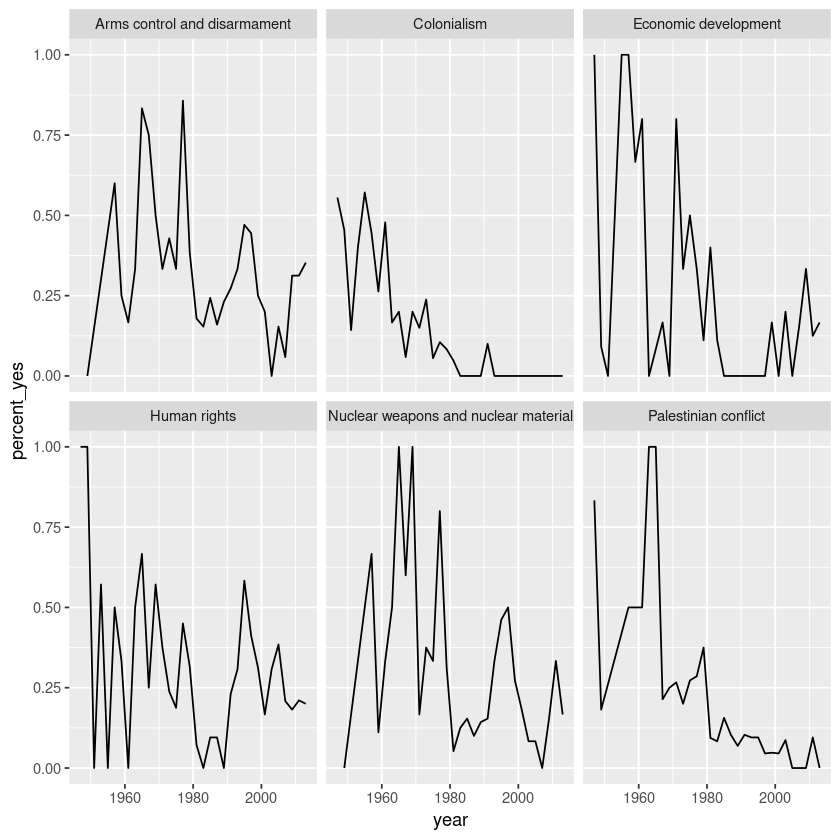

In [9]:
# Load the ggplot2 package
library(ggplot2)

# Filter by_country_year_topic for just the US
US_by_country_year_topic <- by_country_year_topic %>% filter(country=="United States") 

# Plot % yes over time for the US, faceting by topic
ggplot(US_by_country_year_topic,aes(x=year,y=percent_yes))+geom_line() + facet_wrap(~topic)


Nesting by topic and country  
You'll again be modeling change in "percentage" yes over time, but instead of fitting one model for each country, you'll fit one for each combination of country and topic.  

In [11]:
# Load purrr, tidyr, and broom
library(purrr)
library(tidyr)
library(broom)

# Fit a linear model within each country and topic in this dataset, saving the result as country_topic_coefficients. You can use the provided code as a starting point
country_topic_coefficients <- by_country_year_topic %>% nest(-country,-topic) %>%
  mutate(model=map(data, ~ lm(percent_yes ~ year, data = .) ),tidied=map(model,tidy)) %>% unnest(tidied)

# Print country_topic_coefficients
print(country_topic_coefficients)

Warning message:
“All elements of `...` must be named.
Did you want `data = c(-country, -topic)`?”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x

# A tibble: 2,384 × 9
   country     topic       data     model term  estimate std.e…¹ stati…² p.value
   <chr>       <chr>       <list>   <lis> <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1 Afghanistan Colonialism <tibble> <lm>  (Int… -9.20e+0 1.96e+0   -4.70 4.76e-5
 2 Afghanistan Colonialism <tibble> <lm>  year   5.11e-3 9.89e-4    5.17 1.23e-5
 3 Afghanistan Economic d… <tibble> <lm>  (Int… -1.15e+1 3.62e+0   -3.17 3.49e-3
 4 Afghanistan Economic d… <tibble> <lm>  year   6.24e-3 1.83e-3    3.42 1.85e-3
 5 Afghanistan Human righ… <tibble> <lm>  (Int… -7.27e+0 4.37e+0   -1.66 1.06e-1
 6 Afghanistan Human righ… <tibble> <lm>  year   4.08e-3 2.21e-3    1.85 7.43e-2
 7 Afghanistan Palestinia… <tibble> <lm>  (Int… -1.33e+1 3.57e+0   -3.73 8.66e-4
 8 Afghanistan Palestinia… <tibble> <lm>  year   7.17e-3 1.80e-3    3.98 4.42e-4
 9 Afghanistan Arms contr… <tibble> <lm>  (Int… -1.38e+1 4.13e+0   -3.33 2.53e-3
10 Afghanistan Arms contr… <tibble> <lm>  year   7.37e-3 2.08e-3    3.54 1.49e-3
# … wi

In [12]:
# Create country_topic_filtered
#    Filter the country_topic_coefficients data to include only the slope term.
#    Add a p.adjusted column containing adjusted p-values (using the p.adjust() function).
#    Filter for only adjusted p-values less than .05.
#    Save the result as country_topic_filtered.

country_topic_filtered <- country_topic_coefficients %>% filter(term=="year") %>% mutate(p.adjusted=p.adjust(p.value)) %>% filter(p.adjusted < 0.05)

In [13]:
# country_topic_filtered from the previous exercise is available in your workspace. Which combination of country and topic has the steepest downward trend?
arrange(country_topic_filtered,estimate)

country                  topic                               
1  Vanuatu                  Palestinian conflict                
2  Vanuatu                  Colonialism                         
3  Malta                    Nuclear weapons and nuclear material
4  Cyprus                   Human rights                        
5  United States            Palestinian conflict                
6  Cyprus                   Nuclear weapons and nuclear material
7  Israel                   Colonialism                         
8  Romania                  Human rights                        
9  Malta                    Arms control and disarmament        
10 Cyprus                   Arms control and disarmament        
11 United States            Colonialism                         
12 Mauritius                Nuclear weapons and nuclear material
13 Pakistan                 Colonialism                         
14 Egypt                    Colonialism                         
15 Afghanistan              Colonialism                         
16 Malaysia                 Colonialism                         
17 Saudi Arabia             Colonialism                         
18 Thailand                 Colonialism                         
19 India                    Colonialism                         
20 Iran                     Colonialism                         
21 Cuba                     Colonialism                         
22 Sweden                   Colonialism                         
23 Barbados                 Colonialism                         
24 Ecuador                  Colonialism                         
25 Venezuela                Colonialism                         
26 Colombia                 Colonialism                         
27 Belgium                  Colonialism                         
28 Costa Rica               Colonialism                         
29 Peru                     Colonialism                         
30 Laos                     Colonialism                         
31 France                   Arms control and disarmament        
32 Brazil                   Colonialism                         
33 Austria                  Colonialism                         
34 Dominican Republic       Colonialism                         
35 Bolivia                  Colonialism                         
36 Turkey                   Colonialism                         
37 Chile                    Colonialism                         
38 Nicaragua                Colonialism                         
39 Spain                    Colonialism                         
40 Italy                    Colonialism                         
41 Honduras                 Human rights                        
42 Thailand                 Arms control and disarmament        
43 St. Vincent & Grenadines Colonialism                         
44 Turkey                   Palestinian conflict                
45 New Zealand              Colonialism                         
46 South Africa             Nuclear weapons and nuclear material
47 Cuba                     Nuclear weapons and nuclear material
48 Portugal                 Colonialism                         
49 South Africa             Arms control and disarmament        
50 Myanmar (Burma)          Palestinian conflict                
51 Mongolia                 Economic development                
52 Malawi                   Colonialism                         
53 South Africa             Colonialism                         
54 Barbados                 Palestinian conflict                
55 Nepal                    Palestinian conflict                
56 Malawi                   Palestinian conflict                
   data                                                                                                                                                                                                                                                                                                   

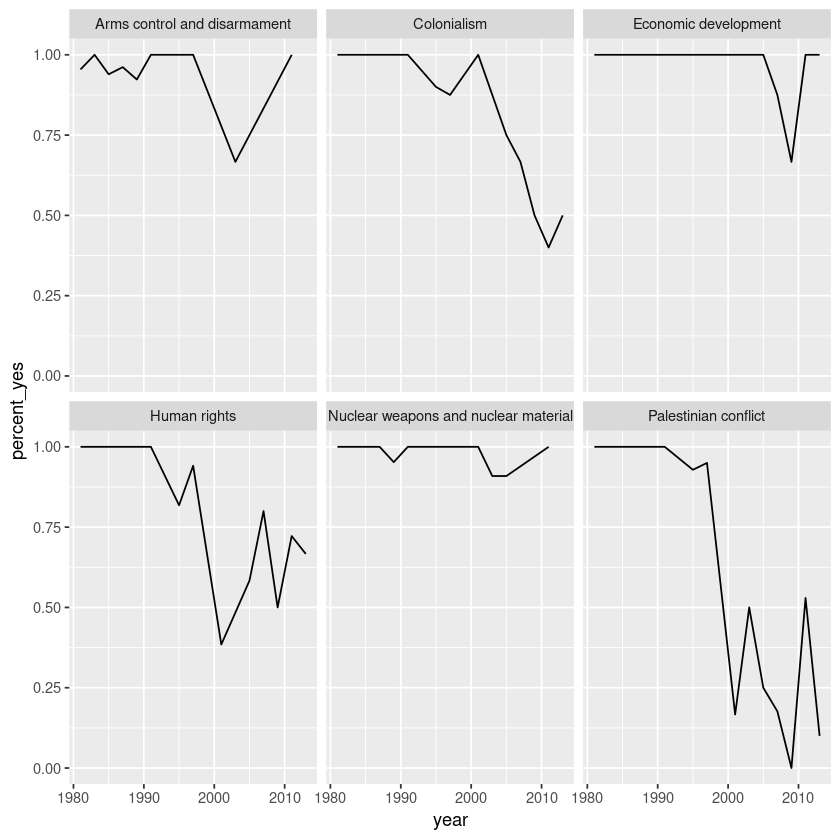

In [14]:
# Filter the by_country_year_topic variable for only Vanuatu's votes to create a vanuatu_by_country_year_topic object.
vanuatu_by_country_year_topic <- by_country_year_topic %>% filter(country=="Vanuatu")

# Plot of percentage "yes" over time, faceted by topic
ggplot(vanuatu_by_country_year_topic, aes(year,percent_yes)) +
  geom_line()+facet_wrap(~topic)